In [1]:
from joblib import dump, load
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from pydlts.fsmodels import SklMultiExpFrequencyScan, SklSingleExpFrequencyScan

from pydlts.fsplots import plot_experimental_points
from pydlts.fsplots import plot_spectr
from pydlts.fsplots import plot_model
from pydlts.fsplots import plot_loss_path
from pydlts.fsplots import plot_deviations

%matplotlib inline

In [2]:
DATASETS_PATH = '../../../datasets/'
PLOTS_PATH = '../../../plots/'
MODELS_PATH = 'saved_models/'

In [3]:
file_names = listdir(DATASETS_PATH)

In [4]:
u1 = -4
ur = -5

data_frames = [[file_name, pd.read_csv(DATASETS_PATH + file_name, parse_dates=[0])] for file_name in file_names]

condition = lambda frame: frame.loc[0, 'u1']==u1 and frame.loc[0, 'ur']==ur
data_frames = [[name, frame] for [name, frame] in data_frames if condition(frame)]

In [5]:
key_func = lambda x: x[1].temperature_k.iloc[0]
data_frames.sort(key=key_func)

for i, item in enumerate(data_frames):
    print(f'{i}.', item[0])

0. 1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_-10С_-4В-5В_10мВ_10мкс_шаг_0,01.csv
1. 1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_+10С_-4В-5В_50мВ_10мкс_шаг_0,01.csv
2. 1564ЛЕ1№1_п1_2500Гц-1Гц_10пФ_+30С_-4В-5В_50мВ_10мкс_шаг_0,1.csv


In [6]:
def get_X_y(dataset):
    filling_pulse = dataset.f_pulse[0] * 10 ** -6
    
    df = dataset.sample(frac=1, random_state=42)
    
    X_train = np.log10(df.frequency_hz.to_numpy())
    y_train = df.dlts_pf.to_numpy()
    
    return filling_pulse, X_train, y_train

Загружаем модель для 263 К

In [7]:
filling_pulse, X_train, y_train = get_X_y(data_frames[0][1])
mean_temp_263 = data_frames[0][1].temperature_k.mean()

In [8]:
f_name = MODELS_PATH + '1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_-10С_-4В-5В_10мВ_10мкс_шаг_0,01_multiexp_grid_search.pkl'
grid_search_263 = load(f_name)
model_263K = grid_search_263.best_estimator_

2022-10-14 06:59:08.226482: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-10-14 06:59:08.226505: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-B550I
2022-10-14 06:59:08.226509: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-B550I
2022-10-14 06:59:08.226670: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.76.0
2022-10-14 06:59:08.226683: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-10-14 06:59:08.226687: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.65.1 does not match DSO version 515.76.0 -- cannot find working devices in this configuration
2022-10-14 06:59:08.226872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This 

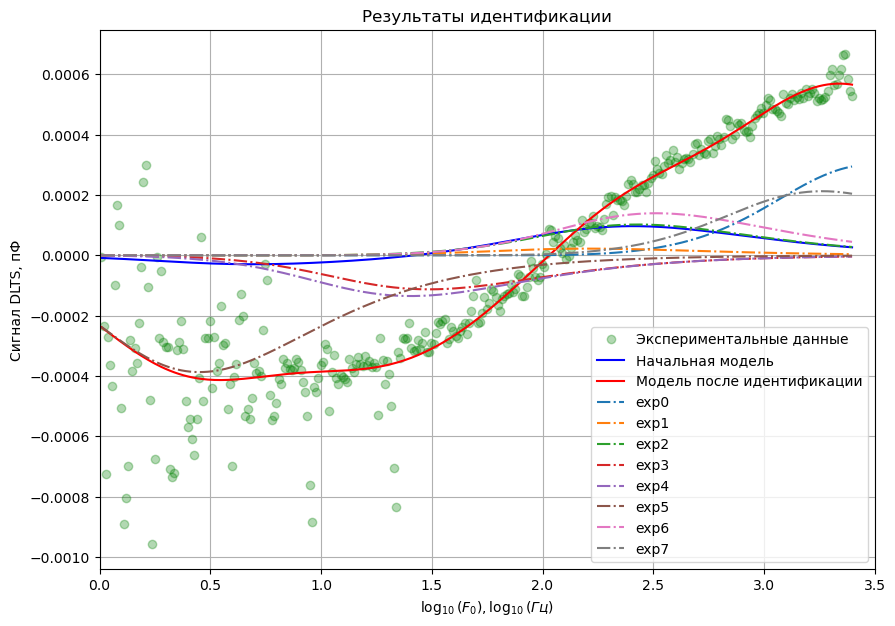

In [9]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, model_263K.fit_results_)
ax.set_ylabel('Сигнал DLTS, пФ')
plt.show()

In [10]:
params_263 = np.stack([model_263K.exps_params_[:, 1], 
                       np.repeat(mean_temp_263, model_263K.exps_params_.shape[0])], 
                      axis=-1)

params_263 = params_263[np.argsort(params_263[:,0]), :]

params_263

array([[-3.86925772e-04,  2.62932356e+02],
       [-1.35011812e-04,  2.62932356e+02],
       [-1.12769316e-04,  2.62932356e+02],
       [ 2.21842147e-05,  2.62932356e+02],
       [ 1.02082370e-04,  2.62932356e+02],
       [ 1.39439978e-04,  2.62932356e+02],
       [ 2.12529898e-04,  2.62932356e+02],
       [ 3.00863367e-04,  2.62932356e+02]])

Загружаем модель для 283 К

In [11]:
filling_pulse, X_train, y_train = get_X_y(data_frames[1][1])
mean_temp_283 = data_frames[1][1].temperature_k.mean()

In [12]:
f_name = MODELS_PATH + '1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_+10С_-4В-5В_50мВ_10мкс_шаг_0,01_multiexp_grid_search.pkl'
grid_search_283 = load(f_name)
model_283K = grid_search_283.best_estimator_

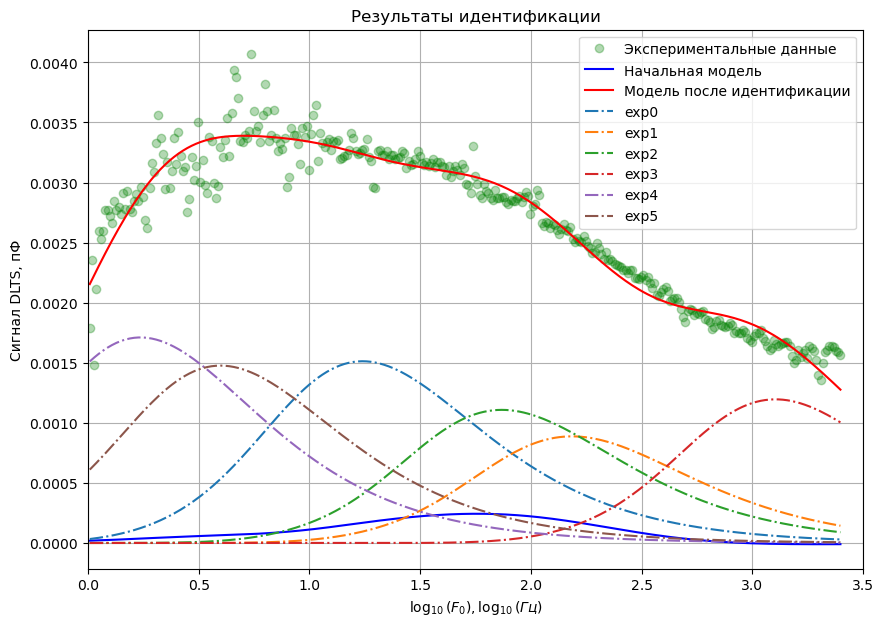

In [13]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, model_283K.fit_results_)
ax.set_ylabel('Сигнал DLTS, пФ')
plt.show()

In [14]:
params_283 = np.stack([model_283K.exps_params_[:, 1], 
                       np.repeat(mean_temp_283, model_283K.exps_params_.shape[0])], 
                      axis=-1)

params_283 = params_283[np.argsort(params_283[:,0]), :]

params_283

array([[8.87480860e-04, 2.83188647e+02],
       [1.10799540e-03, 2.83188647e+02],
       [1.19565100e-03, 2.83188647e+02],
       [1.47632397e-03, 2.83188647e+02],
       [1.51271755e-03, 2.83188647e+02],
       [1.71088427e-03, 2.83188647e+02]])

Загружаем модель для 283 К

In [15]:
filling_pulse, X_train, y_train = get_X_y(data_frames[2][1])
mean_temp_303 = data_frames[2][1].temperature_k.mean()

In [16]:
f_name = MODELS_PATH + '1564ЛЕ1№1_п1_2500Гц-1Гц_10пФ_+30С_-4В-5В_50мВ_10мкс_шаг_0,1_multiexp_grid_search.pkl'
grid_search_303 = load(f_name)
model_303K = grid_search_303.best_estimator_

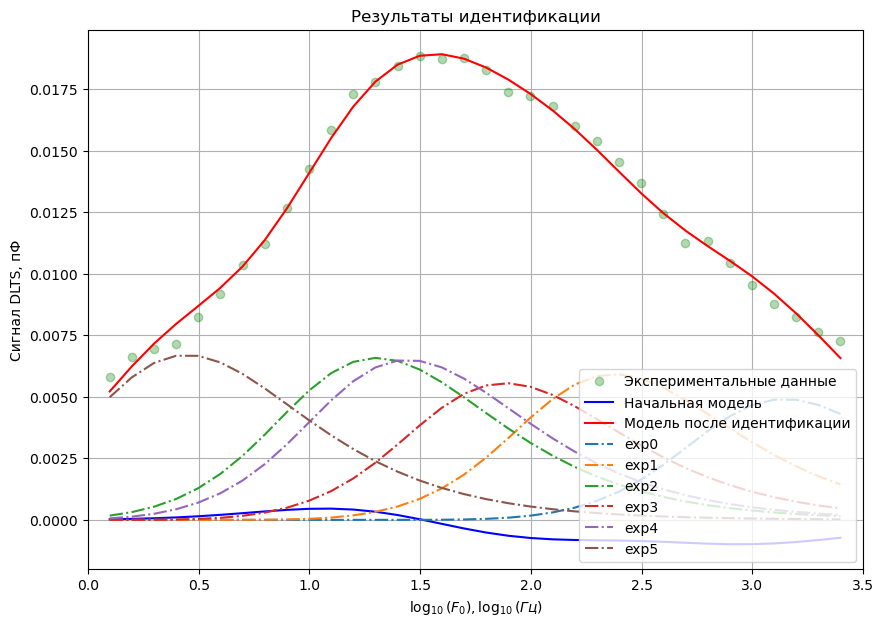

In [17]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, model_303K.fit_results_)
ax.set_ylabel('Сигнал DLTS, пФ')
plt.legend(loc='lower right')
plt.show()

In [18]:
params_303 = np.stack([model_303K.exps_params_[:, 1], 
                       np.repeat(mean_temp_303, model_303K.exps_params_.shape[0])], 
                      axis=-1)

params_303 = params_303[np.argsort(params_303[:,0]), :]

params_303

array([[4.91205519e-03, 3.03271706e+02],
       [5.55595972e-03, 3.03271706e+02],
       [5.92423401e-03, 3.03271706e+02],
       [6.50431245e-03, 3.03271706e+02],
       [6.58568176e-03, 3.03271706e+02],
       [6.70552765e-03, 3.03271706e+02]])